# COVID-19 확산 추세 분석

## (1) 프로젝트 개요

#### 데이터 출처
https://www.kaggle.com/therealcyberlord/coronavirus-covid-19-visualization-prediction/data

#### Feature 구성

- Country/Region: 국가
- Province/State: 지역/주
- Lat: 지역의 위도
- Long: 지역의 경도
- [ Date ] : 각 날짜의 확진자/사망자 수


##(2) EDA 및 데이터 전처리

### 2-1. 데이터 불러오기

In [ ]:
import pandas as pd

In [ ]:
df_case = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df_death = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

In [ ]:
df_case.tail()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,1/22/22,1/23/22,1/24/22,1/25/22,1/26/22,1/27/22,1/28/22,1/29/22,1/30/22,1/31/22,2/1/22,2/2/22,2/3/22,2/4/22,2/5/22,2/6/22,2/7/22,2/8/22,2/9/22,2/10/22,2/11/22,2/12/22,2/13/22,2/14/22,2/15/22,2/16/22,2/17/22,2/18/22,2/19/22,2/20/22,2/21/22,2/22/22,2/23/22,2/24/22,2/25/22,2/26/22,2/27/22,2/28/22,3/1/22,3/2/22
279,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,480583,480583,484979,488599,492694,500444,504992,504992,504992,524716,535160,546176,556550,556550,556550,556550,578424,586355,594037,600128,600128,600128,600128,613846,618527,622175,625028,627956,627956,627956,633684,636055,638172,640214,640214,640214,640214,645947,647203,648039
280,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,72,78,93,106,129,141,177,211,248,272,304,359,380,425,435,459,465,465,465,490,498,501,501,505,507,507,508,508,509,509,509,510,510,514,514,518,521,524,524
281,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,10585,10585,10585,10585,10821,10888,10942,10942,10942,11019,11061,11113,11145,11145,11149,11166,11266,11553,11579,11604,11659,11664,11671,11679,11699,11707,11718,11731,11731,11736,11741,11746,11751,11751,11759,11760,11769,11771,11771,11771
282,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,301203,301630,301924,302569,303266,304002,304353,304656,304922,305047,305557,305959,306347,306777,306777,307206,307317,307636,308050,308556,309013,309293,309502,309579,309870,310155,310474,310764,311016,311194,311264,311592,311888,312118,312374,312611,312707,312750,312970,313203
283,NaN,Zimbabwe,-19.015438,29.154857,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,228179,228254,228541,228776,228943,229096,229333,229415,229460,229666,229851,230012,230170,230170,230402,230402,230402,230603,230740,231040,231214,231299,231381,231603,231603,232213,232598,233030,233224,233352,233571,233980,234589,234967,235467,235803,235803,236380,236871,237503


### 2-2. 데이터 구조 변경

데이터프레임의 Date를 Index로, 국가/지역을 Column으로 변경

In [ ]:
# 불필요한 컬럼 제거, Date 컬럼의 데이터 타입을 datetime으로 변환, Date를 index로 변경

def fix_dataframe(df):
  df = df.drop(['Lat', 'Long'], axis=1).groupby('Country/Region').sum()
  df = df.transpose()

  df.index.name = 'Date'
  df.reset_index(inplace=True)

  df['Date'] = df['Date'].apply(lambda s: pd.to_datetime(str(s)))
  df.set_index('Date', inplace=True)
  
  return df

In [ ]:
df_case = fix_dataframe(df_case)
df_death = fix_dataframe(df_death)

In [ ]:
df_case

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,...,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Summer Olympics 2020,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Tonga,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,548,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,643,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,920,0,0,...,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,5,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1406,0,0,...,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,6,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2075,0,0,...,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,8,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-26,173146,271141,264778,37999,98701,11,7437,8893568,419423,3188117,2636258,782748,33108,509390,1941816,54902,913333,3544034,56597,26567,11820,893048,370652,263950,28749552,55485,1087796,20751,584239,38063,55881,129548,119240,3279166,14187,7248,3015630,248127,6060793,8032,...,696652,2102420,891041,6813,26313,3671991,16955,10977524,644060,61376,865,78092,2441142,2765218,54380,20373,17786,33620,2869616,22649,36798,355,126934,995713,13975389,78929797,163231,5040518,878746,18938546,838341,236174,19,514315,3219177,640214,514,11760,312611,235803
2022-02-27,173395,271527,264855,37999,98701,11,7437,8897178,419693,3209599,2659532,785301,33129,512306,1942680,55031,917468,3544034,56597,26567,12194,893223,370652,263950,28776794,59447,1088520,20751,586198,38063,55882,129920,119240,3283378,14187,7248,3041400,280721,6062701,8033,...,710880,2112272,891950,6937,26313,3673257,16955,10977524,645037,61376,865,78123,2441142,2765218,54480,20433,17786,33620,2891927,22668,36798,355,127404,997754,14025181,78947866,163250,5040518,879368,18938546,840511,236299,19,514315,3321005,640214,518,11769,312707,235803
2022-02-28,173659,271563,264936,37999,98741,11,7437,8900656,419832,3235017,2679742,785670,33135,514883,1943577,55165,919736,3557314,56694,26567,12702,893395,371202,263950,28796571,63542,1091279,20751,587891,38127,55886,130276,119240,3291827,14225,7255,3061019,315387,6064583,8033,...,724424,2119358,892620,7049,26313,3674042,16973,10977524,646034,61458,865,78216,2441142,2801951,54575,20489,17786,33620,2891927,22693,36798,355,127767,998230,14089456,79044330,163307,5040518,879973,19021076,842462,236405,19,515124,3443485,645947,521,11771,312750,236380


In [ ]:
df_death

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,...,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Summer Olympics 2020,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Tonga,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,56,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-26,7585,3458,6828,151,1899,0,135,126048,8433,5157,14762,9358,771,1450,29024,313,6454,30121,650,163,6,21419,15411,2619,649184,115,35458,375,19360,38,401,3032,1923,36507,113,190,42070,5213,138598,160,...,999,18413,6276,93,1348,99191,137,99410,16166,3901,0,1316,17142,13082,3068,853,125,798,22891,128,272,1,3617,27702,94026,948457,3585,112459,2301,161797,6961,1630,1,5631,40050,5458,0,2133,3951,5393
2022-02-27,7593,3464,6831,151,1899,0,135,126120,8449,5171,14787,9400,771,1453,29033,315,6470,30121,650,163,6,21426,15411,2619,649437,121,35482,375,19365,38,401,3032,1923,36536,113,190,42200,5295,138693,160,...,1007,18453,6292,96,1348,99229,137,99410,16190,3901,0,1316,17142,13080,3071,853,125,798,22933,128,272,1,3622,27773,94232,948639,3588,112459,2301,161797,6977,1633,1,5631,40144,5458,0,2134,3952,5393
2022-02-28,7598,3469,6835,151,1900,0,135,126152,8461,5210,14809,9417,771,1454,29037,316,6480,30179,650,163,6,21438,15459,2619,649676,125,35581,375,19368,38,401,3032,1923,36594,113,190,42353,5380,138767,160,...,1019,18485,6307,99,1348,99412,137,99410,16222,3908,0,1317,17142,13101,3075,853,125,798,22933,128,272,0,3628,27784,94445,950732,3588,112459,2301,161934,6985,1635,1,5636,40522,5501,0,2135,3952,5395


### 2-3 국가별 데이터 시각화

국가별 확진자 수 및 사망자 수 시각화

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

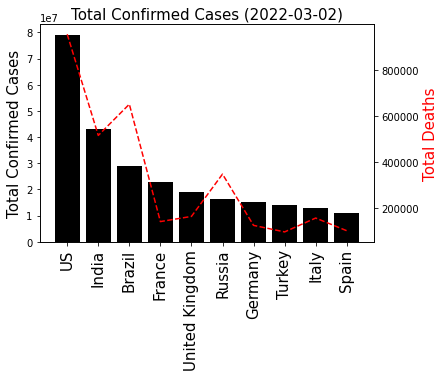

In [ ]:
# 최신일자를 기준으로 확진자가 가장 많은 10개국
top_ten_cases = df_case.loc[df_case.index[-1]].sort_values(ascending=False)[:10]
sns.barplot(x=top_ten_cases.index, y=top_ten_cases, color='black')

plt.xticks(rotation=90, size=15)
plt.ylabel('Total Confirmed Cases', size=15)
plt.xlabel('')
plt.title('Total Confirmed Cases (%s)' % top_ten_cases.name.strftime('%Y-%m-%d'), size=15)

ax = plt.gca()
ax2 = ax.twinx()

top_ten_deaths = df_death.loc[df_death.index[-1]][top_ten_cases.index]
ax2.plot(top_ten_deaths.index, top_ten_deaths, 'r--')
ax2.set_ylabel('Total Deaths', color='red', size=15)

plt.show()

In [ ]:
# 국가별 시간에 따른 확진자 수 및 사망자 수

def plot_case_with_death(country):
    plt.figure(figsize=(10,5))

    plt.plot(df_case.index, df_case[country], 'b-')
    plt.ylabel('Confirmed Cases', color='blue')
    plt.title(country + ' Cases & Deaths')
    plt.xlabel('Date')
    plt.xlim(right=df_case.index[-1])
    plt.ylim(0, df_case[country].max()*1.1)

    ax = plt.gca()
    ax2 = ax.twinx()
    ax2.plot(df_death.index, df_death[country], 'r--')
    ax2.set_ylabel('Deaths', color='red')
    ax2.set_ylim(0, df_death[country].max()*1.3)

    plt.show()

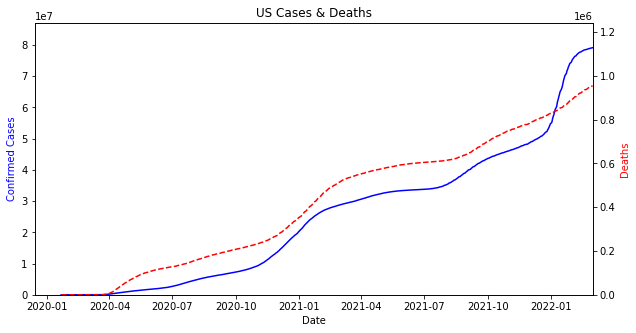

In [ ]:
plot_case_with_death('US')

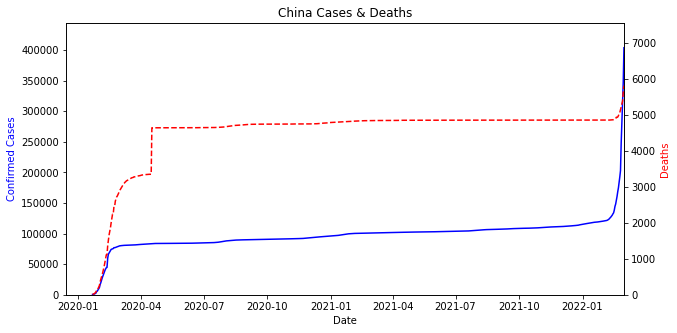

In [ ]:
plot_case_with_death('China')

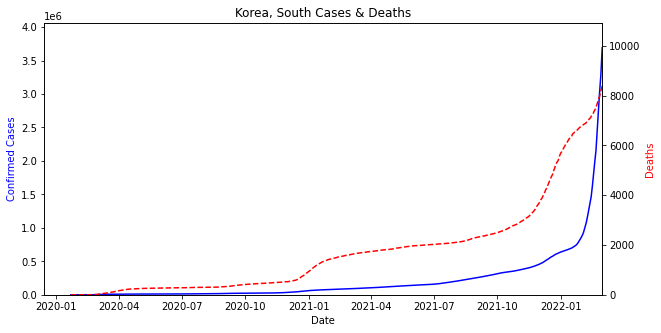

In [ ]:
plot_case_with_death('Korea, South')

In [ ]:
import plotly.graph_objects as go

In [ ]:
# 아래 데이터프레임를 이용하여 국가명을 국가코드로 변경
df_code = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')

# 기존 데이터프레임의 국가명과 다르게 표기된 국가의 이름을 먼저 변경한 후에 코드로 변경
country_renamer = {
    'Bahamas':'Bahamas, The',
    'Congo (Brazzaville)':'Congo, Republic of the',
    'Congo (Kinshasa)':'Congo, Democratic Republic of the',
    'Czechia':'Czech Republic',
    'Eswatini':'Swaziland',
    'Gambia':'Gambia, The',
    'North Macedonia':'Macedonia',
    'Taiwan*':'Taiwan',
    'US':'United States',
    'West Bank and Gaza':'West Bank'
}

In [ ]:
df_code.head()

,COUNTRY,GDP (BILLIONS),CODE
0,Afghanistan,21.71,AFG
1,Albania,13.40,ALB
2,Algeria,227.80,DZA
3,American Samoa,0.75,ASM
4,Andorra,4.80,AND


In [ ]:
df_case.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,...,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Summer Olympics 2020,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Tonga,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,548,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,643,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,920,0,0,...,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,5,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1406,0,0,...,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,6,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2075,0,0,...,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,8,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,2,0,0,0,0,0


In [ ]:
country_to_code = df_code.set_index('COUNTRY')['CODE']

In [ ]:
df_c = df_case.rename(country_renamer, axis=1).copy()

for col in df_c.columns:
  if col not in country_to_code.index:
    df_c.drop(col, axis=1, inplace=True)
df_code = df_c.rename(country_to_code, axis=1)

df_code

Country/Region,AFG,ALB,DZA,AND,AGO,ATG,ARG,ARM,AUS,AUT,AZE,BHM,BHR,BGD,BRB,BLR,BEL,BLZ,BEN,BTN,BOL,BIH,BWA,BRA,BRN,BGR,BFA,MMR,BDI,CPV,KHM,CMR,CAN,CAF,TCD,CHL,CHN,COL,COM,COG,...,SYC,SLE,SGP,SVK,SVN,SLB,SOM,ZAF,SSD,ESP,LKA,SDN,SUR,SWE,CHE,SYR,TWN,TJK,TZA,THA,TLS,TGO,TON,TTO,TUN,TUR,USA,UGA,UKR,ARE,GBR,URY,UZB,VUT,VEN,VNM,WBG,YEM,ZMB,ZWE
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,548,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,643,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,920,0,0,0,...,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,5,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1406,0,0,0,...,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,6,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2075,0,0,0,...,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,8,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-26,173146,271141,264778,37999,98701,7437,8893568,419423,3188117,2636258,782748,33108,509390,1941816,54902,913333,3544034,56597,26567,11820,893048,370652,263950,28749552,55485,1087796,20751,584239,38063,55881,129548,119240,3279166,14187,7248,3015630,248127,6060793,8032,23967,...,39251,7665,696652,2102420,891041,6813,26313,3671991,16955,10977524,644060,61376,78092,2441142,2765218,54380,20373,17786,33620,2869616,22649,36798,355,126934,995713,13975389,78929797,163231,5040518,878746,18938546,838341,236174,19,514315,3219177,640214,11760,312611,235803
2022-02-27,173395,271527,264855,37999,98701,7437,8897178,419693,3209599,2659532,785301,33129,512306,1942680,55031,917468,3544034,56597,26567,12194,893223,370652,263950,28776794,59447,1088520,20751,586198,38063,55882,129920,119240,3283378,14187,7248,3041400,280721,6062701,8033,23967,...,39251,7665,710880,2112272,891950,6937,26313,3673257,16955,10977524,645037,61376,78123,2441142,2765218,54480,20433,17786,33620,2891927,22668,36798,355,127404,997754,14025181,78947866,163250,5040518,879368,18938546,840511,236299,19,514315,3321005,640214,11769,312707,235803
2022-02-28,173659,271563,264936,37999,98741,7437,8900656,419832,3235017,2679742,785670,33135,514883,1943577,55165,919736,3557314,56694,26567,12702,893395,371202,263950,28796571,63542,1091279,20751,587891,38127,55886,130276,119240,3291827,14225,7255,3061019,315387,6064583,8033,24020,...,39336,7665,724424,2119358,892620,7049,26313,3674042,16973,10977524,646034,61458,78216,2441142,2801951,54575,20489,17786,33620,2891927,22693,36798,355,127767,998230,14089456,79044330,163307,5040518,879973,19021076,842462,236405,19,515124,3443485,645947,11771,312750,236380


Choropleth Map

- 공식 레퍼런스 참조 : https://plotly.com/python/choropleth-maps/#world-choropleth-map

In [ ]:
# date에 해당하는 날짜로 데이터 생성

def get_choropleth_data(date):
    data = go.Choropleth(
        locations = df_code.columns,
        z = df_code.loc[date],
        text = df_c.columns,
        colorscale = 'algae_r',
        autocolorscale=False,
        reversescale=True,
        marker_line_color='darkgray',
        marker_line_width=0.5,
        colorbar_tickprefix = '',
        colorbar_title = 'Confirmed Cases',
    )
    return data

In [ ]:
date = df_case.index[-1]
data = get_choropleth_data(date)
fig = go.Figure(data=data)
fig.update_layout(
    title_text='Confirmed Cases in ' + str(date),
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    )
)

fig.show()

### 2-4 데이터 전처리

FBProphet 학습을 위한 데이터프레임 생성

In [ ]:
# 우리나라의의 확진자 수 데이터를 FBProphet에 학습하기 위한 데이터프레임으로 재구성

df = pd.DataFrame(df_case.reset_index()[['Date', 'Korea, South']].to_numpy(), columns=['ds', 'y'])
df

,ds,y
0,2020-01-22,1
1,2020-01-23,1
2,2020-01-24,2
3,2020-01-25,2
4,2020-01-26,3
...,...,...
766,2022-02-26,2994841
767,2022-02-27,3134456
768,2022-02-28,3273449
769,2022-03-01,3492686
